In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations

In [28]:
def generate_subsets(n):
    # Generate all possible subsets of size 1 to n.
    for size in range(1, n + 1):
        for subset in combinations(range(n), size):
            yield subset
            # print(subset)


def check_p(matrix):
    n = len(matrix)

    # Compute the determinant of the whole matrix first.
    determinant = np.linalg.det(matrix)
    if determinant <= 0:
        return False  # Return immediately if the whole matrix has a non-positive determinant

    # Check the determinants of diagonal elements (smallest subset) next.
    for i in range(n):
        submatrix = matrix[i, i]
        if submatrix <= 0:
            return False  # Return immediately if any diagonal element is non-positive

    # Initialize the generator to get subsets.
    subset_generator = generate_subsets(n)

    # Check the determinants of other subsets.
    for subset in subset_generator:
        if len(subset) > 1:
            submatrix = matrix[np.ix_(subset, subset)]
            determinant = np.linalg.det(submatrix)
            if determinant <= 0:
                return False  # Return immediately if a non-positive determinant is found

    return True # Return True if all determinants are positive


def generate_matrix(n):
    # Generate a random matrix with values between -1 and 1
    matrix = np.random.uniform(-1, 1, (n, n))
    # Set diagonal elements to 1
    np.fill_diagonal(matrix, 1)
    
    return matrix

In [29]:
# n = 3
# iterations = 100
# kappa = 0.5
# all_p = 0
# G1_p_G2_p_G_n = 0
# G1_n_G2_p_G_p = 0
# G1_n_G2_p_G_n = 0
# G1_n_G2_n_G_p = 0
# non_p = 0

# for i in range(iterations):
#     G1 = generate_matrix(n)
#     G2 = generate_matrix(n)
#     G = kappa * G1 + (1 - kappa) * G2
#     result1 = check_p(G1)
#     result2 = check_p(G2)
#     result = check_p(G)
    
#     if result1 & result2 & result:
#         all_p += 1
#     elif result1 & result2 & (not result):
#         G1_p_G2_p_G_n += 1
#     elif (result1 & (not result2) & result) or ((not result1) and result2 and result):
#         G1_n_G2_p_G_p += 1
#     elif (result1 & (not result2) & (not result)) or ((not result1) and result2 and (not result)):
#         G1_n_G2_p_G_n += 1
#     elif (not result1) and (not result2) and result:
#         G1_n_G2_n_G_p += 1
#     elif (not result1) and (not result2) and (not result):
#         non_p += 1

    
# print("layers have a unique NE and so does the Multiplex: ", all_p)
# print("layers have a unique NE but the Multiplex does not: ", G1_p_G2_p_G_n)
# print("only one layer has a unique NE and so does the Multiplex: ", G1_n_G2_p_G_p)
# print("only one layer has a unique NE but the Multiplex does not: ", G1_n_G2_p_G_n)
# print("no layer has a unique NE but the Multiplex does: ", G1_n_G2_n_G_p)
# print("no layer has a unique NE and neither does the Multiplex: ", non_p)
# print("total: ", all_p + G1_p_G2_p_G_n + G1_n_G2_p_G_p + G1_n_G2_p_G_n + G1_n_G2_n_G_p + non_p)

# # categories = ['Layers and Multiplex \u2192 NE', 'Both layers \u2192 NE\nMultiplex \u219B NE', 'One layer \u2192 NE\nMultiplex \u2192 NE', 'One layer \u2192 NE\nmultiplex \u219B NE', 'Neither the layers nor\nthe Multiplex with NE']


In [30]:
# n_list = [3, 4, 5, 6, 7, 8, 9, 10]

# # Setting up subplots with shared y-axis
# fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey=True, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# for i, n in enumerate(n_list):
#     all_p = 0
#     G1_p_G2_p_G_n = 0
#     G1_n_G2_p_G_p = 0
#     G1_n_G2_p_G_n = 0
#     G1_n_G2_n_G_p = 0
#     non_p = 0

#     iterations = 100
#     kappa = 0.5

#     for j in range(iterations):
#         G1 = generate_matrix(n)
#         G2 = generate_matrix(n)
#         G = kappa * G1 + (1 - kappa) * G2
#         result1 = check_p(G1)
#         result2 = check_p(G2)
#         result = check_p(G)

#         if result1 & result2 & result:
#             all_p += 1
#         elif result1 & result2 & (not result):
#             G1_p_G2_p_G_n += 1
#         elif (result1 & (not result2) & result) or ((not result1) and result2 and result):
#             G1_n_G2_p_G_p += 1
#         elif (result1 & (not result2) & (not result)) or ((not result1) and result2 and (not result)):
#             G1_n_G2_p_G_n += 1
#         elif (not result1) and (not result2) and result:
#             G1_n_G2_n_G_p += 1
#         elif (not result1) and (not result2) and (not result):
#             non_p += 1

#     # Creating a bar plot for each n in a subplot
#     categories = ['Layers and Multiplex \u2192 NE', 'Both layers \u2192 NE\nMultiplex \u219B NE', 'One layer \u2192 NE\nMultiplex \u2192 NE', 'One layer \u2192 NE\nmultiplex \u219B NE', 'Neither the layers nor\nthe Multiplex with NE']
#     counts = [all_p, G1_p_G2_p_G_n, G1_n_G2_p_G_p, G1_n_G2_p_G_n, non_p]
#     total_counts = sum(counts)
    
#     percentages = [count / total_counts * 100 for count in counts]

#     row_index = i // 4
#     col_index = i % 4

#     bars = axes[row_index, col_index].barh(categories, percentages, color='skyblue')

#     # Remove axis lines and ticks
#     axes[row_index, col_index].spines['top'].set_visible(False)
#     axes[row_index, col_index].spines['right'].set_visible(False)
#     axes[row_index, col_index].spines['bottom'].set_visible(False)
#     axes[row_index, col_index].spines['left'].set_visible(False)
#     axes[row_index, col_index].tick_params(axis='both', which='both', length=0)
    
#     # Remove x-axis numbers
#     axes[row_index, col_index].get_xaxis().set_visible(False)

#     axes[row_index, col_index].set_title(f'n={n}')

#     # Adding data values on top of the bars
#     for bar, percentage in zip(bars, percentages):
#         axes[row_index, col_index].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%',
#                                         va='center', ha='left', fontsize=8)

# # Adjust layout
# plt.tight_layout()
# plt.savefig('multiplex.png', dpi=600)
# plt.show()

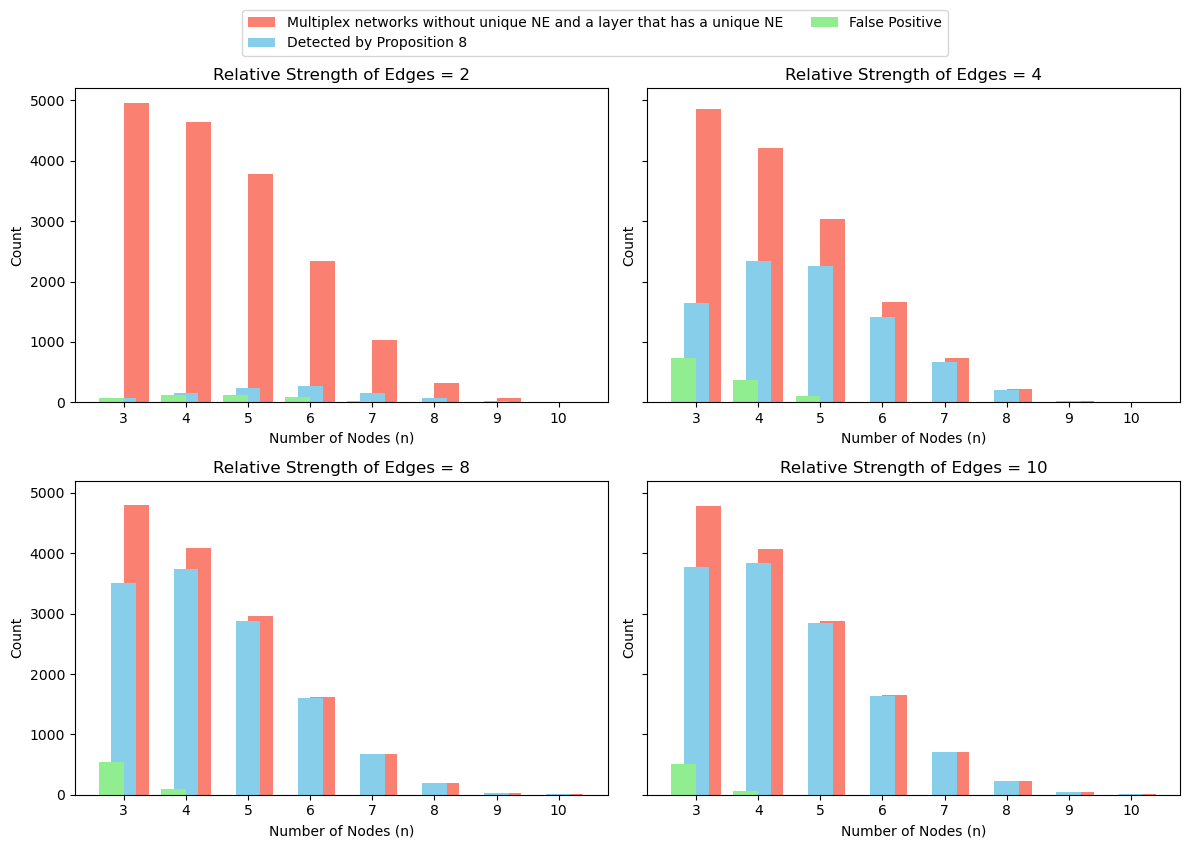

In [31]:
import numpy as np
import matplotlib.pyplot as plt
n_list = [3, 4, 5, 6, 7, 8, 9, 10]
kappa = 0.5
iterations = 5000
strength_list = [2, 4, 8, 10]

# Prepare the figure for 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
axs = axs.flatten()  # Flatten the axs array for easy indexing

# Bar colors
bar_color1 = 'skyblue'
bar_color2 = 'salmon'

# Loop through each strength value
for idx, strength in enumerate(strength_list):
    condition_true_counts = []
    total_counts = []
    false_positive_list = []

    for n in n_list:
        condition_true_count = 0
        total_count = 0
        false_positive = 0

        for i in range(iterations):
            G1 = generate_matrix(n)
            G2 = generate_matrix(n)*strength
            # threshold = strength * 0.2
            # G2[abs(G2) < threshold] = 0
            np.fill_diagonal(G2, 1)
            
            G = kappa * G1 + (1 - kappa) * G2
            result1 = check_p(G1)
            result2 = check_p(G2)
            result = check_p(G)

            lambda_min_G2 = np.min(np.linalg.eigvals(G2 - np.eye(n)))
            lambda_max_G1 = np.max(np.linalg.eigvals(G1 - np.eye(n)))
            condition = abs(lambda_min_G2) >= (1 / (1 - kappa)) * (1 + (kappa * lambda_max_G1))
                    
            # Check the conditions for unique NEs
            if (result1 & (not result2)) or ((not result1) & result2):
                if not result:
                    total_count += 1
                    # Check condition for the matrices here
                    if condition:
                        condition_true_count += 1
            # counting false positives
            if result:
                total_count += 1
                if condition:
                    false_positive += 1
        condition_true_counts.append(condition_true_count)
        total_counts.append(total_count)
        false_positive_list.append(false_positive)
    
    # Calculate percentages
    percentages = [ctc / tc * 100 if tc > 0 else 0 for ctc, tc in zip(condition_true_counts, total_counts)]
    false_positive_percentages = [fp / tc * 100 if tc > 0 else 0 for fp, tc in zip(false_positive_list, total_counts)]

    # Plotting for this strength value
    ax = axs[idx]
    width = 0.4
    x = np.arange(len(n_list))

    ax.bar(x + width/2, total_counts, width, color=bar_color2)
    ax.bar(x, condition_true_counts, width, color=bar_color1)
    ax.bar(x - width/2, false_positive_list, width, color='lightgreen')

    ax.set_xlabel('Number of Nodes (n)')
    ax.set_ylabel('Count')
    ax.set_title(f'Relative Strength of Edges = {strength}')
    ax.set_xticks(x)
    ax.set_xticklabels(n_list)
    # ax.legend()

    # for i, v in enumerate(percentages):
    #     ax.text(i, 8, f'{v:.1f}%')

labels = ['Multiplex networks without unique NE and a layer that has a unique NE', 'Detected by Proposition 8', 'False Positive']
fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)
plt.tight_layout(rect=[0, 0.1, 1, 0.9])
plt.savefig('multiplex-prop-neg.png', dpi=600)
plt.show()


In [21]:
def generate_negative_matrix(n):
    # Generate a random matrix with values between -1 and 0
    matrix = np.random.uniform(-1, 0, (n, n))
    # Set diagonal elements to 1
    np.fill_diagonal(matrix, 1)
    
    return matrix

def is_m_matrix(matrix):
    B = matrix - np.eye(n)
    rho = np.max(np.abs(np.linalg.eigvals(-B)))
    return rho < 1

def is_PD_matrix(matrix):
    return np.all(np.linalg.eigvals(matrix) > 0)

def generate_symmetric(n):
    # Generate a random matrix with values between -1 and 1
    A = np.random.uniform(-1, 1, (n, n))
    matrix = (A + A.T) / 2
    # Set diagonal elements to 1
    np.fill_diagonal(matrix, 1)
    
    return matrix

def calculate_2_norm(matrix):
    # Perform Singular Value Decomposition
    U, s, V = np.linalg.svd(matrix)
    
    # The 2-norm is the largest singular value
    return max(s)

In [22]:
iterations = 10000
n_list = [3, 4, 5, 6, 7, 8, 9, 10]
kappa = 0.5

# For M-matrix
for n in n_list:
    for i in range(iterations):
        G1 = generate_negative_matrix(n)
        G2 = generate_symmetric(n)
        G = kappa * G1 + (1 - kappa) * G2
        result1 = check_p(G1)
        result2 = check_p(G2)
        result = check_p(G)
        
        lambda_max_G2 = np.max(np.linalg.eigvals(G2-np.eye(n)))
        lambda_min_G1 = np.min(np.linalg.eigvals(G1-np.eye(n)))

        if result1: # G1 is a P-matrix
            if is_m_matrix(G1): # G1 is an M-matrix
                condition = lambda_max_G2 < ((2 * kappa - 1) / (1 - kappa)) + (kappa/ (1-kappa)) * lambda_min_G1
                if condition & (not result): # condition is satisfied but G is not a P-matrix (should not happen!)
                    print("\nwelp!")

In [23]:
iterations = 10000
n_list = [3, 4, 5, 6, 7, 8, 9, 10]
kappa = 0.5

# For PD matrix
for n in n_list:
    for i in range(iterations):
        G1 = generate_symmetric(n)
        G2 = generate_symmetric(n)
        G = kappa * G1 + (1 - kappa) * G2

        result1 = is_PD_matrix(G1) # first layer has a unique NE
        result2 = is_PD_matrix(G2) # second layer has a unique NE
        result = is_PD_matrix(G) # multiplex has a unique NE

        lambda_min_G1 = np.min(np.linalg.eigvals(G1-np.eye(n)))
        lambda_max_G2 = np.max(np.linalg.eigvals(G2-np.eye(n)))

        condition = lambda_max_G2 < ((2 * kappa - 1) / (1 - kappa)) + (kappa/ (1-kappa)) * lambda_min_G1

        if result1 & condition & (not result): # first layer has a unique NE and condition is satisfied but multiplex does not have a unique NE (should not happen!)
            print("welp! n: ", n)
            break
            # print(G1)
            # print("\n")
            # print(G2)
            # print("\n")
            # print(G)
            # print("lambda_max_G1: ", lambda_max_G1)
            # print("lambda_max_G2: ", lambda_max_G2)
            # print("condition: ", condition)

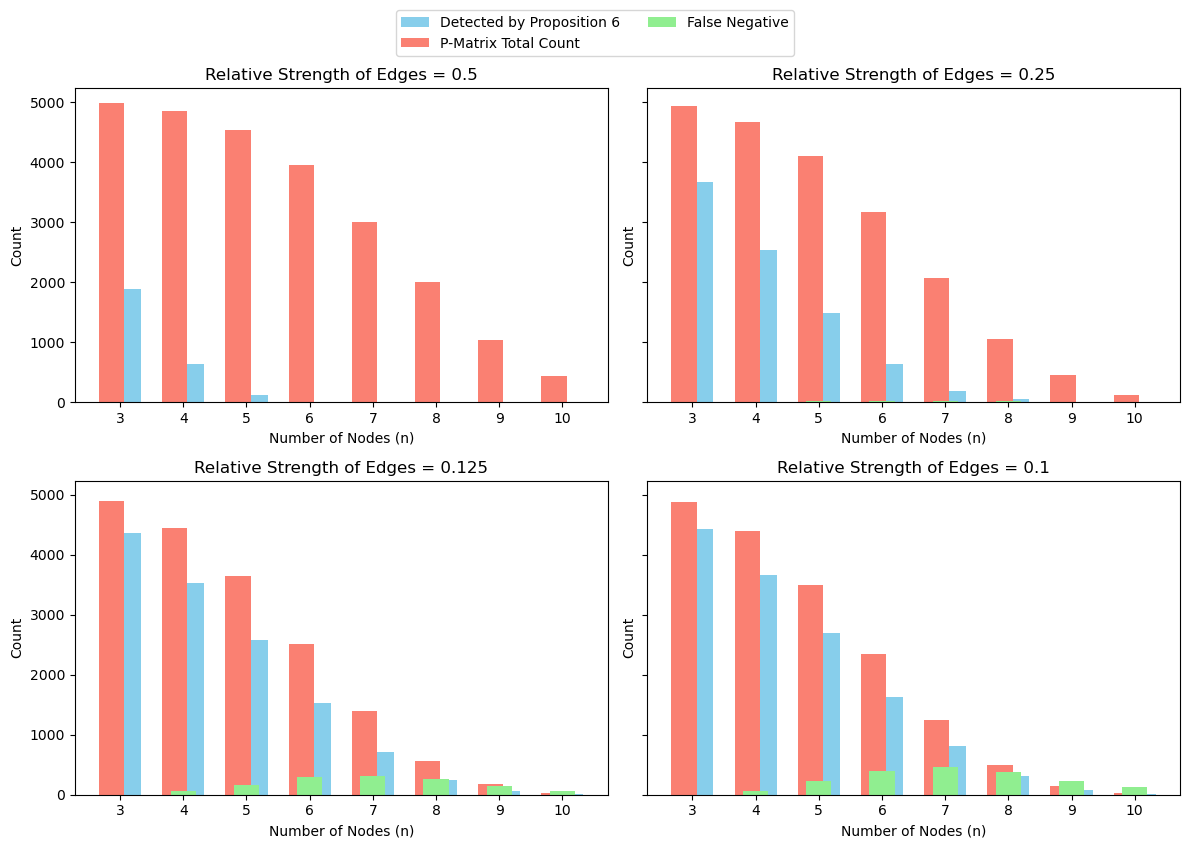

In [33]:
iterations = 5000
n_list = [3, 4, 5, 6, 7, 8, 9, 10]
kappa = 0.5
condition_help_list = []
p_matrix_total_list = []
strength_list = [0.5, 0.25, 0.125, 0.1]

# Prepare the figure for 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
axs = axs.flatten()  # Flatten the axs array for easy indexing

# Bar colors
bar_color1 = 'skyblue'
bar_color2 = 'salmon'

for idx, strength in enumerate(strength_list):
    condition_help_list = []
    p_matrix_total_list = []
    false_negative_list = []

    for n in n_list:
        condition_help_count = 0
        p_matrix_total_count = 0
        false_negative = 0

        for i in range(iterations):
            G1 = generate_matrix(n)
            G2 = generate_matrix(n) * strength
            G = kappa * G1 + (1 - kappa) * G2
            result = check_p(G)

            lambda_min_G1 = np.min(np.linalg.eigvals(G1-np.eye(n)))
            lambda_max_G2 = np.max(np.linalg.eigvals(G2-np.eye(n)))

            condition = lambda_max_G2 < ((2 * kappa - 1) / (1 - kappa)) + (kappa/ (1-kappa)) * lambda_min_G1

            if condition & result:
                condition_help_count += 1
            if result:
                p_matrix_total_count += 1
            if condition & (not result):
                false_negative += 1
        
        condition_help_list.append(condition_help_count)
        p_matrix_total_list.append(p_matrix_total_count)
        false_negative_list.append(false_negative)

    percentages = [ctc / tc * 100 if tc > 0 else 0 for ctc, tc in zip(condition_help_list, p_matrix_total_list)]
    false_positive_percentages_2 = [fp / tc * 100 if tc > 0 else 0 for fp, tc in zip(false_negative_list, p_matrix_total_list)]

    # Plotting for this strength value
    ax = axs[idx]
    width = 0.4
    x = np.arange(len(n_list))

    ax.bar(x + width/3, condition_help_list, width, color=bar_color1)
    ax.bar(x - width/3, p_matrix_total_list, width, color=bar_color2)
    ax.bar(x, false_negative_list, width, color='lightgreen')

    ax.set_xlabel('Number of Nodes (n)')
    ax.set_ylabel('Count')
    ax.set_title(f'Relative Strength of Edges = {strength}')
    ax.set_xticks(x)
    ax.set_xticklabels(n_list)

    # for i, v in enumerate(percentages):
    #     ax.text(i, v + 5, f'{v:.1f}%', ha='center')

# Adding a single legend at the upper center
labels = ['Detected by Proposition 6', 'P-Matrix Total Count', 'False Negative']
fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

plt.tight_layout(rect=[0, 0.1, 1, 0.9])
# Uncomment to save the figure
# plt.savefig('multiplex_subplot_2x2.png', dpi=600)
plt.show()

# Max eigval experiments


In [34]:
#  define a function to compute the maximum eigenvalue of a matrix
def max_eigenvalue(matrix):
    return np.max(np.linalg.eigvals(matrix))

# define a function to generate sparse matrices of size n
def generate_sparse_matrix(n, lower, upper, threshold):
    # generate a random matrix with values between lower and upper
    matrix = np.random.uniform(lower, upper, (n, n))
    # set diagonal elements to 0
    np.fill_diagonal(matrix, 0)
    # set all elements below threshold to 0
    matrix[abs(matrix) < threshold] = 0

    return matrix

# define a function to generate random matrices of size n
def generate_random_matrix(n):
    # generate a random matrix with values between -1 and 1
    matrix = np.random.uniform(-1, 1, (n, n))
    # set diagonal elements to 0
    np.fill_diagonal(matrix, 0)

    return matrix

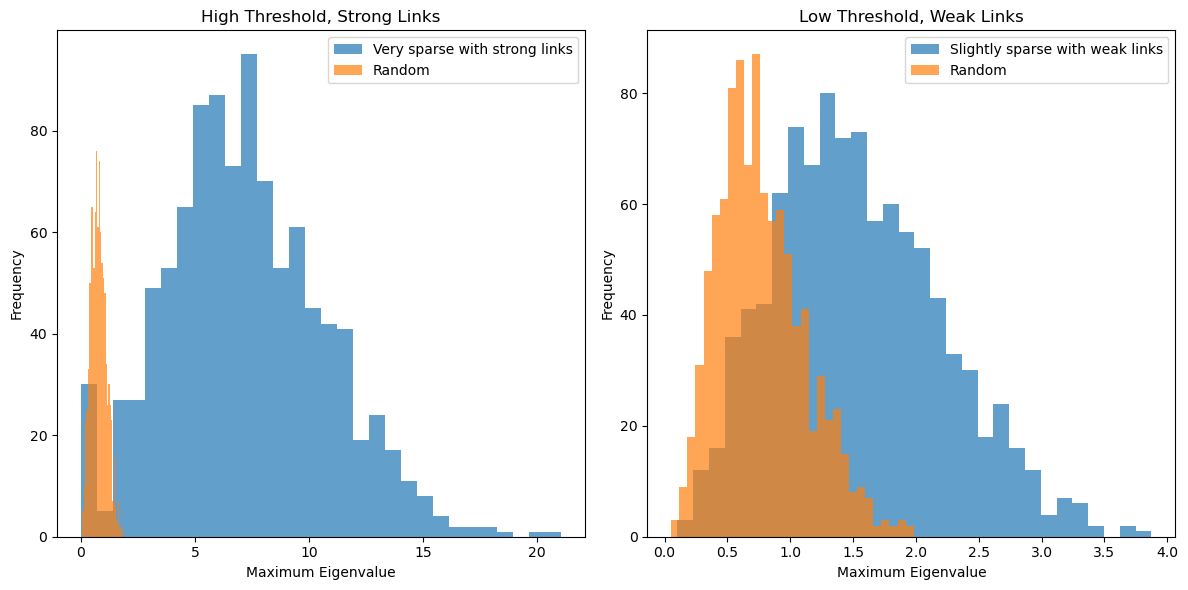

In [37]:
# Define matrix size
n = 5
num_instances = 1000

# Initialize lists to store maximum eigenvalues
max_eigenvalues_sparse_strong = []
max_eigenvalues_random_strong = []
max_eigenvalues_sparse_weak = []
max_eigenvalues_random_weak = []

for _ in range(num_instances):
    # High threshold (very sparse matrix) and strong links (high values of lower and upper)
    sparse_matrix_strong = generate_sparse_matrix(n, -10, 10, 4)
    random_matrix_strong = generate_random_matrix(n)

    # Low threshold (not very sparse) and not very strong links
    sparse_matrix_weak = generate_sparse_matrix(n, -2, 2, 0.1)
    random_matrix_weak = generate_random_matrix(n)

    # Computing max eigenvalues
    max_eigenvalues_sparse_strong.append(max_eigenvalue(sparse_matrix_strong).real)
    max_eigenvalues_random_strong.append(max_eigenvalue(random_matrix_strong).real)
    max_eigenvalues_sparse_weak.append(max_eigenvalue(sparse_matrix_weak).real)
    max_eigenvalues_random_weak.append(max_eigenvalue(random_matrix_weak).real)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(max_eigenvalues_sparse_strong, bins=30, alpha=0.7, label='Very sparse with strong links')
plt.hist(max_eigenvalues_random_strong, bins=30, alpha=0.7, label='Random')
plt.title('High Threshold, Strong Links')
plt.xlabel('Maximum Eigenvalue')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(max_eigenvalues_sparse_weak, bins=30, alpha=0.7, label='Slightly sparse with weak links')
plt.hist(max_eigenvalues_random_weak, bins=30, alpha=0.7, label='Random')
plt.title('Low Threshold, Weak Links')
plt.xlabel('Maximum Eigenvalue')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()